## Association Rules for Books

In [89]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sn 
import plotly
from chart_studio import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
from wordcloud import WordCloud
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from scipy.cluster import hierarchy as sch
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv(r"C:\Users\Adith\Desktop\Data Science_Excel R\home assignments\Association rules\book.csv")

## Data exploration

In [41]:
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [42]:
#checking information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [43]:
# most popular items
count = df.iloc[:,:].sum()
count

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

In [44]:
#checking for values of each book 
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print()

ChildBks
0    1154
1     846
Name: ChildBks, dtype: int64

YouthBks
0    1505
1     495
Name: YouthBks, dtype: int64

CookBks
0    1138
1     862
Name: CookBks, dtype: int64

DoItYBks
0    1436
1     564
Name: DoItYBks, dtype: int64

RefBks
0    1571
1     429
Name: RefBks, dtype: int64

ArtBks
0    1518
1     482
Name: ArtBks, dtype: int64

GeogBks
0    1448
1     552
Name: GeogBks, dtype: int64

ItalCook
0    1773
1     227
Name: ItalCook, dtype: int64

ItalAtlas
0    1926
1      74
Name: ItalAtlas, dtype: int64

ItalArt
0    1903
1      97
Name: ItalArt, dtype: int64

Florence
0    1783
1     217
Name: Florence, dtype: int64



In [45]:
print('the most purchased books are {}'.format(df.columns))
print('the count of purchased books are {}'.format(df.columns.size))

the most purchased books are Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')
the count of purchased books are 11


In [91]:
df1 = df.iloc[:,0:11]

## Visualization

In [95]:
#visualization the percent of sales of books 

px.pie(df1,values=df1.sum(),names=df1.columns
      ,title='Purchase Rate of books',
      color_discrete_sequence=px.colors.sequential.RdBu_r,
      hover_name=df1.columns,hole=0.5)



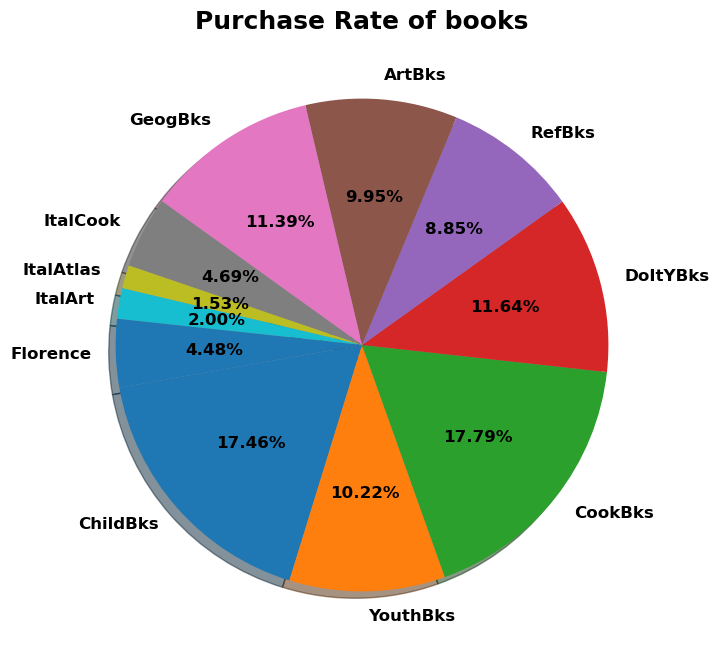

In [100]:
plt.figure(figsize = (12,8))
plt.pie(df1.sum(),
       labels=df1.columns,
       explode = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Purchase Rate of books", fontsize = 18, fontweight = 'bold')
plt.show()


From the above plot we observe that most of people have purchased child books and cook books,trailing to it we also have with marginal difference doltybooks and geography books, the least purchased are italArt and italAtlas with a very minimal percent of sales 

In [103]:
# Top 10 Popular items
count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

,items,count
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


In [102]:
#visualizing the rate of purchase by barplot 
px.bar(x=df1.columns,y=count,text=df1.sum(),color=count,
      title= 'sales rate of books',color_continuous_scale='viridis',hover_name=df1.columns,orientation='v',)

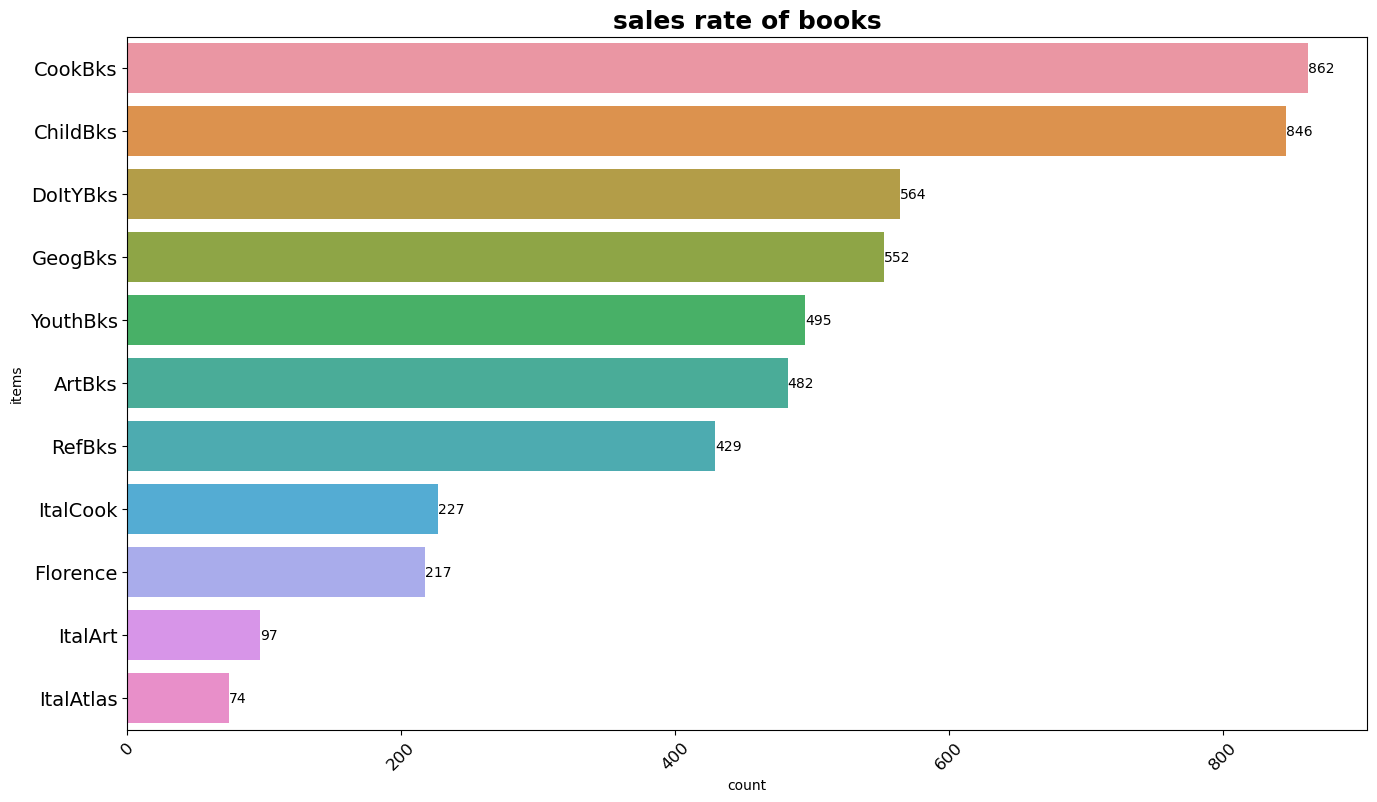

In [105]:
plt.figure(figsize = (16,9))
ax = sn.barplot(x = 'count', y = 'items', data= count)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('sales rate of books',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

its very evidently clear that our highest sales of books are child and youth books and are lowest sales are ItalAtlas and ItalArt Books

## Apriori Algorithm

In [48]:
#fitting our support at 20%
freq_books = apriori(df,min_support=0.2,use_colnames=True)
freq_books

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [49]:
#fitting our association rule with confidence 75%
rules_1 = association_rules(freq_books,metric='lift',min_threshold=0.75)
rules_1.sort_values('lift',ascending=False)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


In [50]:
rules_1[rules_1.lift>=1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


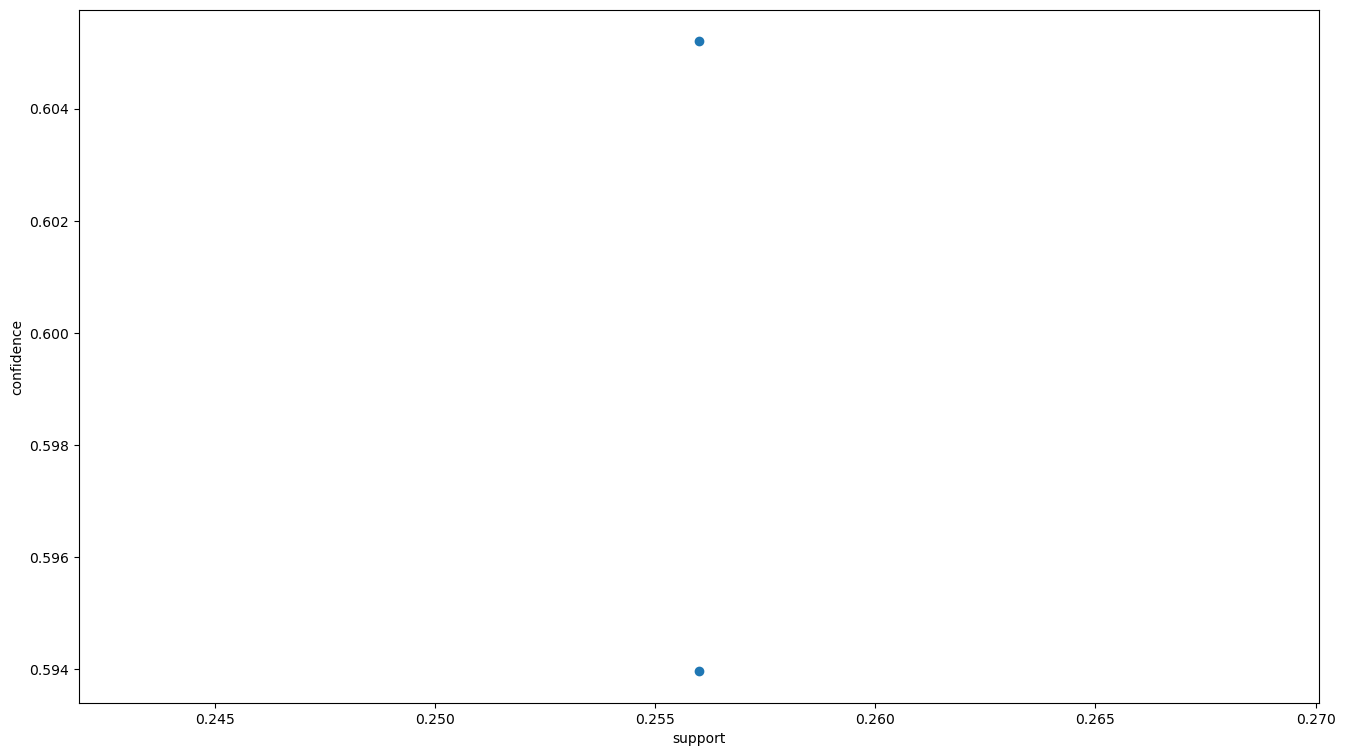

In [106]:
# visualization of obtained rule 1
plt.figure(figsize=(16,9))
plt.scatter(rules_1['support'],rules_1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

We can observe that at 20% support and 75% confidence we can say that people are interested purchasing cooking books and children books.this tells us that parents with their children or for their children are purchasing books for themselves 

In [52]:
#fitting our association rules at 10% support 
freq_books_2 = apriori(df,min_support=0.1,use_colnames=True)
freq_books_2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [53]:
#fitting our association rule with confidence 70%
rules_2 = association_rules(freq_books_2,metric='lift',min_threshold=0.7)
rules_2.sort_values('lift',ascending=False,inplace=True)
rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


In [54]:
#checking for the association of items 
rules_2[rules_2.lift>=1.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
21,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678


In [55]:
#checking for the association of items 
rules_2[rules_2.lift<=1.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [56]:
#checking for association of items at 90% confidence
rules_2[rules_2.confidence>=0.7]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
82,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
88,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
54,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
78,"(GeogBks, ArtBks)",(ChildBks),0.1275,0.423,0.1020,0.800000,1.891253,0.048067,2.885000
94,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812
42,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
52,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
72,"(DoItYBks, GeogBks)",(ChildBks),0.1325,0.423,0.1045,0.788679,1.864490,0.048452,2.730446
46,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158


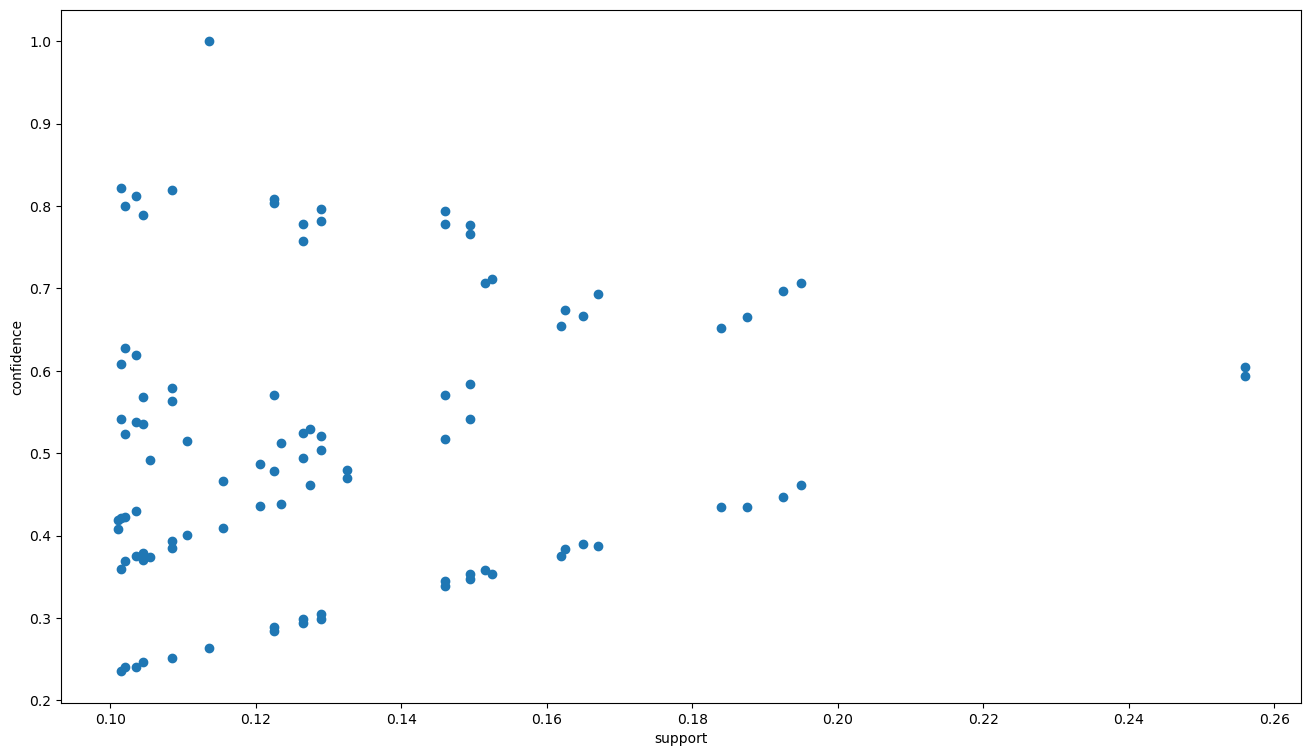

In [107]:
# visualization of obtained rule 2
plt.figure(figsize=(16,9))
plt.scatter(rules_2['support'],rules_2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

After observation of lift ratios and plot we observe that people who are interested in cooking books are also interested into italian cooking books,also people purchasing artbooks and child books are purchasing geography books, at 10% suport and 70% confidence we have good association with a good lift ratio,the least association we can find is with youth books and child books also doltybooks with cookbooks 

In [58]:
#fitting our support at 5% support and 90% confidence
freq_books_3 = apriori(df,min_support=0.05,use_colnames=True)
freq_books_3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(YouthBks, DoItYBks, GeogBks, CookBks)"
96,0.0560,"(YouthBks, GeogBks, ArtBks, CookBks)"
97,0.0650,"(GeogBks, DoItYBks, ArtBks, CookBks)"
98,0.0510,"(GeogBks, DoItYBks, ChildBks, YouthBks, CookBks)"


In [59]:
#fitting our association rule with confidence 90%
rules_3 = association_rules(freq_books_3,metric='lift',min_threshold=0.9)
rules_3.sort_values('lift',ascending=False,inplace=True)
rules_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
184,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
181,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
508,"(ChildBks, ItalCook)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923
513,"(GeogBks, CookBks)","(ChildBks, ItalCook)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125
511,"(GeogBks, ItalCook)","(ChildBks, CookBks)",0.0640,0.2560,0.0525,0.820312,3.204346,0.036116,4.140522
...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
15,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
14,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


In [60]:
rules_3[rules_3.lift>=1.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
184,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
181,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
508,"(ChildBks, ItalCook)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923
513,"(GeogBks, CookBks)","(ChildBks, ItalCook)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125
511,"(GeogBks, ItalCook)","(ChildBks, CookBks)",0.0640,0.2560,0.0525,0.820312,3.204346,0.036116,4.140522
...,...,...,...,...,...,...,...,...,...
26,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
15,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678


In [61]:
rules_3[rules_3.lift<=1.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [62]:
#checking for association of items at 90% confidence
rules_3[rules_3.confidence>=0.9]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
34,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
264,"(GeogBks, ItalCook)",(CookBks),0.0640,0.431,0.0640,1.000000,2.320186,0.036416,inf
258,"(ArtBks, ItalCook)",(CookBks),0.0565,0.431,0.0565,1.000000,2.320186,0.032148,inf
108,"(ChildBks, ItalCook)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf
504,"(ChildBks, GeogBks, ItalCook)",(CookBks),0.0525,0.431,0.0525,1.000000,2.320186,0.029872,inf
234,"(DoItYBks, ItalCook)",(CookBks),0.0585,0.431,0.0585,1.000000,2.320186,0.033287,inf
180,"(YouthBks, ItalCook)",(CookBks),0.0590,0.431,0.0590,1.000000,2.320186,0.033571,inf
353,"(YouthBks, RefBks, DoItYBks)",(ChildBks),0.0580,0.423,0.0530,0.913793,2.160267,0.028466,6.693200
395,"(YouthBks, RefBks, GeogBks)",(ChildBks),0.0570,0.423,0.0515,0.903509,2.135955,0.027389,5.979818
602,"(ChildBks, YouthBks, DoItYBks, GeogBks)",(CookBks),0.0565,0.431,0.0510,0.902655,2.094327,0.026648,5.845182


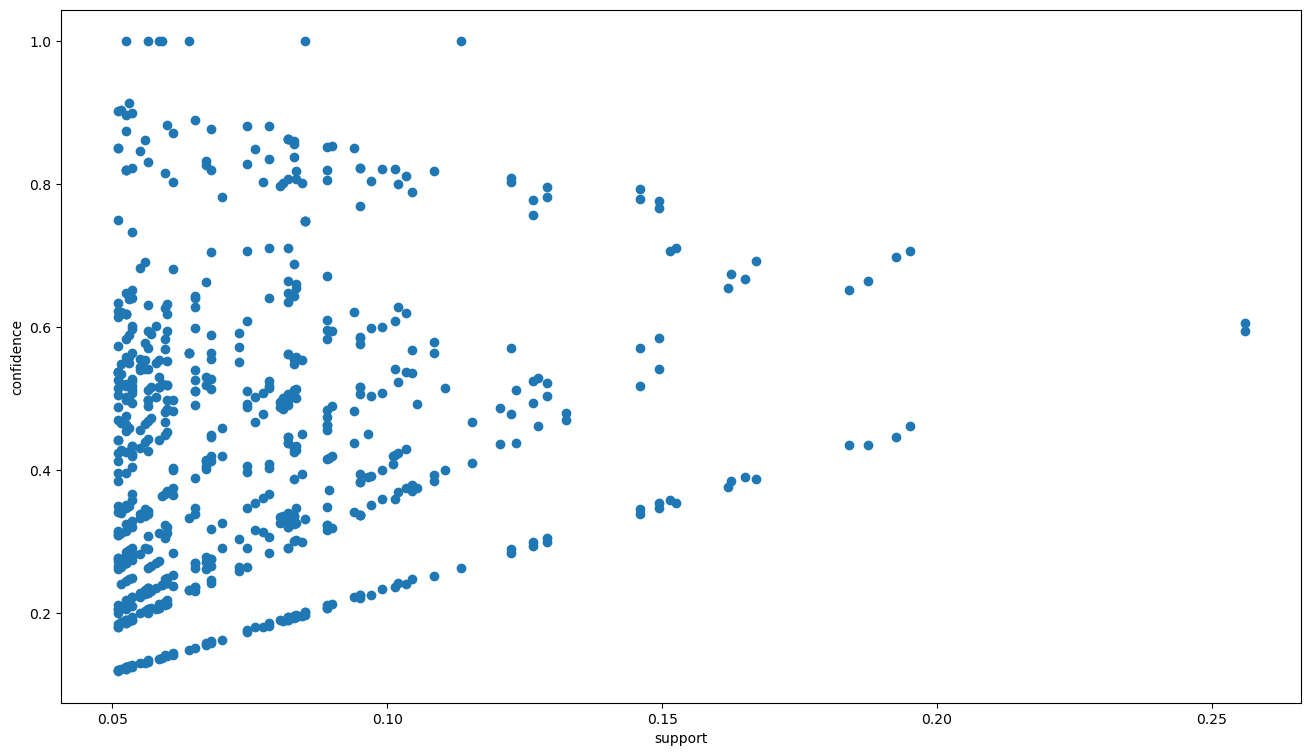

In [108]:
# visualization of obtained rule 3
plt.figure(figsize=(16,9))
plt.scatter(rules_3['support'],rules_3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

With 5% support and 90% confidence we observe that people that are interested in italian cooking and childbooks are also interested in cooking books and people who are purchasing cooking books are also interested in geography,dolty and youth books 

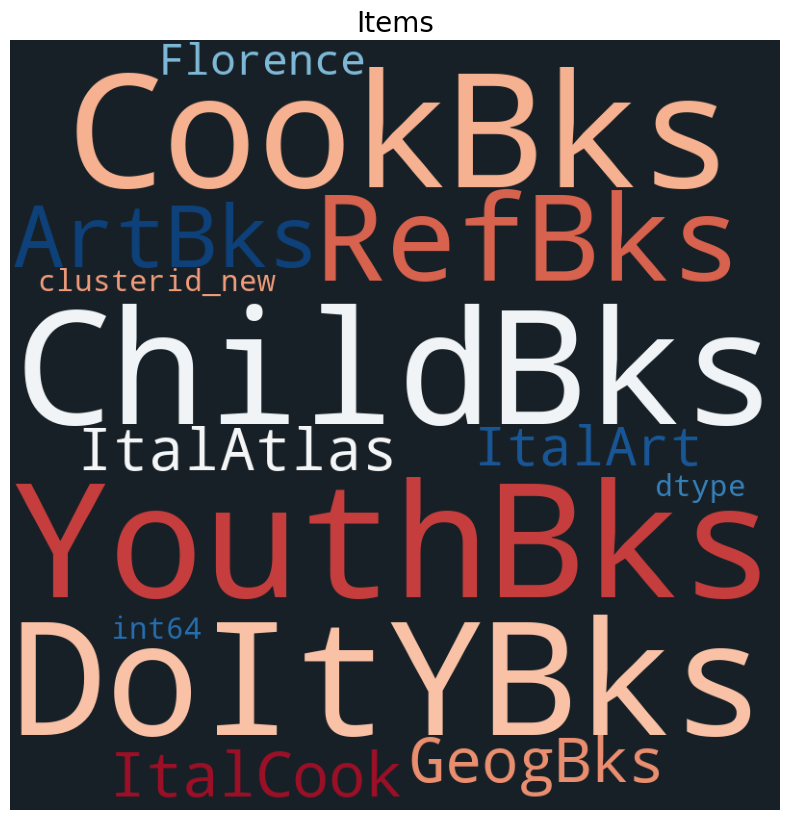

In [75]:
#wordcloud to just see the most frequent types of books 
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = '#172026',colormap='RdBu_r' ,width = 800,  height = 800, max_words = 121).generate(str(df.sum()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

## Clustering for customers vision

KMeans

In [65]:
#elbow method for determining the K value 
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i,random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

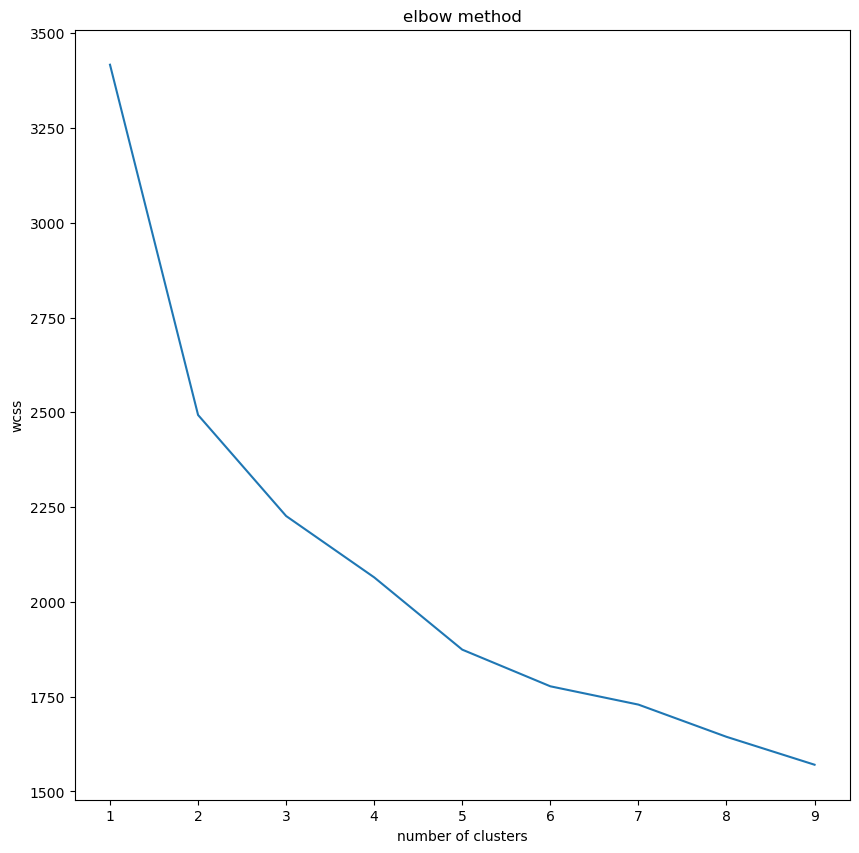

In [66]:
#plotting the slbow graph 
plt.plot(range(1,10),wcss)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [67]:
clusters_new = KMeans(3, random_state= 100)
clusters_new.fit(df)

KMeans(n_clusters=3, random_state=100)

In [68]:
clusters_new.labels_

array([1, 1, 1, ..., 1, 2, 1])

In [69]:
df['clusterid_new'] = clusters_new.labels_
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence,clusterid_new
0,0,1,0,1,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,1,0,1,0,1,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0,2


In [70]:
clusters_new.cluster_centers_

array([[8.98686679e-01, 5.98499062e-01, 8.72420263e-01, 6.81050657e-01,
        5.70356473e-01, 6.15384615e-01, 7.20450281e-01, 3.05816135e-01,
        1.14446529e-01, 1.55722326e-01, 1.68855535e-01],
       [2.52336449e-01, 1.22429907e-01, 1.72084569e-15, 1.36448598e-01,
        7.10280374e-02, 9.43925234e-02, 1.06542056e-01, 6.10622664e-16,
        3.73831776e-03, 3.73831776e-03, 9.90654206e-02],
       [2.44332494e-01, 1.13350126e-01, 1.00000000e+00, 1.38539043e-01,
        1.23425693e-01, 1.33501259e-01, 1.36020151e-01, 1.61209068e-01,
        2.26700252e-02, 2.51889169e-02, 5.28967254e-02]])

In [71]:
df[df['clusterid_new']==0]

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence,clusterid_new
3,1,1,1,0,1,0,1,0,0,0,0,0
9,1,1,1,0,0,0,1,0,0,0,0,0
13,1,1,0,1,1,1,0,0,1,1,0,0
15,1,1,1,0,0,0,1,0,0,0,0,0
18,1,1,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1983,1,1,1,0,1,1,0,1,1,1,0,0
1987,1,1,1,1,0,1,1,0,0,0,0,0
1990,1,0,1,1,0,0,1,1,0,0,0,0
1992,0,1,1,1,0,1,1,1,0,1,0,0


In [72]:
df[df['clusterid_new']==1]

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence,clusterid_new
0,0,1,0,1,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1
5,1,0,0,0,0,1,0,0,0,0,1,1
6,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1993,0,0,0,0,0,0,0,0,0,0,0,1
1994,0,0,0,0,0,0,0,0,0,0,0,1
1996,0,0,0,0,0,0,0,0,0,0,0,1
1997,0,0,0,0,0,0,0,0,0,0,0,1


In [73]:
df[df['clusterid_new']==2]

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence,clusterid_new
4,0,0,1,0,0,0,1,0,0,0,0,2
11,0,0,1,0,0,0,1,0,0,0,0,2
14,1,1,1,0,0,0,0,0,0,0,0,2
16,0,0,1,0,0,0,0,0,0,0,0,2
17,0,0,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1976,0,0,1,0,0,0,0,0,0,0,0,2
1979,0,0,1,1,0,1,0,0,0,0,0,2
1980,0,0,1,1,0,1,0,1,0,0,0,2
1982,0,0,1,0,0,0,0,0,0,0,0,2


In [74]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.898687,0.598499,0.87242,0.681051,0.570356,0.615385,0.720450,0.305816,0.114447,0.155722,0.168856
1,1,0.252336,0.122430,0.00000,0.136449,0.071028,0.094393,0.106542,0.000000,0.003738,0.003738,0.099065
2,2,0.244332,0.113350,1.00000,0.138539,0.123426,0.133501,0.136020,0.161209,0.022670,0.025189,0.052897


Conclusions with Clustering

1)After clustering we have know that transactions happened in cluster id 0 are most of the customers interested purchasing 
most of types of books, evidently the association of childbooks and cookBooks.

2)when we check with cluster 1  we observe that transaction frequency are very low and hardly customers interaction has been with association of childbooks and youth books 

3)when we check cluster 2 the highest transactions have been with cookbooks in association with youth books,dolty books,artbooks,Refbooks, geographybooks and ital cooking, we can say that these clusters are purchasing book with association to each other 

Conclusion with Association Rules

1)With 20% support and 75% confidence we have observed that customers have engaged with cooking books and childbooks, we have seen under our first rule that association between these items attract a lot of customers,we can also say that 20% of customers are nly interested with only these two items.

2)With 10% support and 70% confidence we have observed that customers have engaged with two or more items like with child books they are purchasing cook books,geogbooks and artbooks.and for the growth of sales we can engage the rate of support with recommendations or discounts 

3)With 5% support and 90% confidence we have observed  that customers who are purchasing  italbooks are engaging with rest of the books and the purchase rate of other categories also have a good scale,for these kind of customers we could put them in cluster 3 and give them suggestions or offers 

4)To conclude Association rules is a rule to understand what goes with what, and pattern or trends of transaction and creating different rules according our requirement and visualise the purchases to sell items in combination to one another.